In [1]:
import sys
import os
import cv2
import pickle
import random
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential,load_model 
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization,Input,add,Activation
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, precision_score, recall_score, f1_score
%matplotlib inline

Using TensorFlow backend.


# Load all the pre-processed images combined

In [2]:
# Loading images from pickle as NumPy array
pickle_images = open('x_test',  'rb')
x_test = pickle.load(pickle_images)

# Loading labels from pickle as NumPy array
pickle_labels = open('y_test',  'rb')
y_test = pickle.load(pickle_labels)

# Loading images from pickle as NumPy array
pickle_images = open('x_train',  'rb')
x_train = pickle.load(pickle_images)

# Loading labels from pickle as NumPy array
pickle_labels = open('y_train',  'rb')
y_train = pickle.load(pickle_labels)

pickle_images = open('x_val',  'rb')
x_val = pickle.load(pickle_images)
x_val=1-x_val
# Loading labels from pickle as NumPy array
pickle_labels = open('y_val',  'rb')
y_val = pickle.load(pickle_labels)


In [45]:
y_val.shape,y_train.shape,y_test.shape

((26678, 28), (218826, 28), (61451, 28))

# Plotting the training dataset count

C:\Users\MOneb\anaconda3\envs\ev_2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


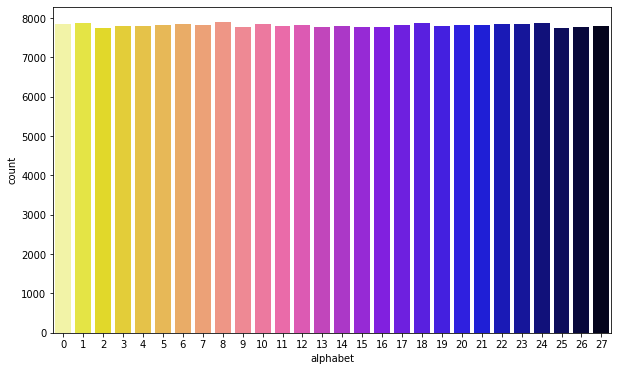

In [47]:
y_class = [np.argmax(element) for element in y_train]
plt.figure(figsize=(10,6))
co=sn.countplot(y_class,palette="gnuplot2_r")
plt.xlabel("alphabet")
plt.show()

# Show examples of the dataset

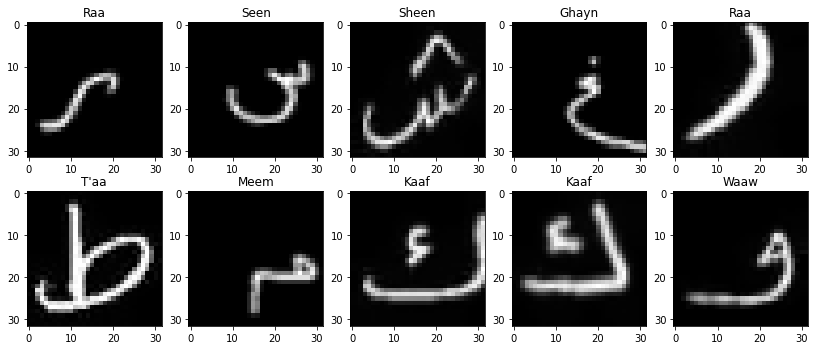

In [41]:
arabic_characters = ['Alef', 'Baa', 'Taa', 'Thaa', 'Jeem', "H'aa", 'Khaa', 'Daal', 'Thaal',
                    'Raa', 'Zaay', 'Seen', 'Sheen', 'Saad', 'Daad', "T'aa", 'Dhaa', 'Ayn',
                    'Ghayn', 'Faa', 'Qaaf', 'Kaaf', 'Laam', 'Meem', 'Noon', 'Haa', 'Waaw', 'Yaa']
y_class = [np.argmax(element) for element in y_val]

plt.figure(figsize=(14,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    x = random.randint(0,len(y_val))
    plt.imshow(x_val[x].reshape(32,32),"gray")
    plt.title(arabic_characters[y_class[x]])
plt.show()

# CNN approach

In [15]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(32, 32,1)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(28, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=3, 
        verbose=1, mode='auto', restore_best_weights=True)

history=model.fit(x_train, y_train,validation_data=(x_val,y_val),callbacks=[monitor], epochs=30,verbose=1, batch_size = 32)
accuracy=model.evaluate(x_test,y_test)
accuracy

Train on 218826 samples, validate on 26678 samples
Epoch 1/30
218826/218826 [==============================] - 97s 442us/step - loss: 0.5679 - accuracy: 0.8204 - val_loss: 0.1230 - val_accuracy: 0.9627
Epoch 2/30
218826/218826 [==============================] - 33s 153us/step - loss: 0.2043 - accuracy: 0.9377 - val_loss: 0.1008 - val_accuracy: 0.9677
Epoch 3/30
218826/218826 [==============================] - 33s 153us/step - loss: 0.1671 - accuracy: 0.9493 - val_loss: 0.0922 - val_accuracy: 0.9717
Epoch 4/30
218826/218826 [==============================] - 33s 152us/step - loss: 0.1586 - accuracy: 0.9525 - val_loss: 0.0938 - val_accuracy: 0.9731
Epoch 5/30
218826/218826 [==============================] - 33s 152us/step - loss: 0.1516 - accuracy: 0.9550 - val_loss: 0.0955 - val_accuracy: 0.9713
Epoch 6/30
218826/218826 [==============================] - 34s 154us/step - loss: 0.1523 - accuracy: 0.9555 - val_loss: 0.0831 - val_accuracy: 0.9756
Epoch 7/30
218826/218826 [=================

[0.09397300237906289, 0.9726285934448242]

# Saving the model & model's history

In [16]:
accuracy=round(accuracy[1],5)*100

save_model= str(accuracy)+"Kaggle_all_CNN"

pickle_out = open(save_model,"wb")
pickle.dump(history, pickle_out) 
pickle_out.close()

model.save(save_model+".h5" )

# LeNet5 with modifications

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (32, 32, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(28, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=3, 
        verbose=1, mode='auto', restore_best_weights=True)

model_checkpoint_callback = ModelCheckpoint(
    filepath="all_images\\best.h5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')

history=model.fit(x_train, y_train,validation_data=(x_val,y_val), callbacks=[model_checkpoint_callback], epochs=40,verbose=1, batch_size = 32)
accuracy=model.evaluate(x_test,y_test)
accuracy

Train on 218826 samples, validate on 26678 samples
Epoch 1/40
218826/218826 [==============================] - 69s 317us/step - loss: 0.5082 - accuracy: 0.8419 - val_loss: 0.4076 - val_accuracy: 0.8796

Epoch 00001: val_accuracy improved from -inf to 0.87964, saving model to C:\Users\MOneb\deep learning\Final\all_images\best.h5
Epoch 2/40
218826/218826 [==============================] - 109s 498us/step - loss: 0.1585 - accuracy: 0.9501 - val_loss: 0.1351 - val_accuracy: 0.9590

Epoch 00002: val_accuracy improved from 0.87964 to 0.95895, saving model to C:\Users\MOneb\deep learning\Final\all_images\best.h5
Epoch 3/40
218826/218826 [==============================] - 66s 302us/step - loss: 0.1122 - accuracy: 0.9646 - val_loss: 0.1061 - val_accuracy: 0.9684

Epoch 00003: val_accuracy improved from 0.95895 to 0.96844, saving model to C:\Users\MOneb\deep learning\Final\all_images\best.h5
Epoch 4/40
218826/218826 [==============================] - 348s 2ms/step - loss: 0.0896 - accuracy: 0.97

218826/218826 [==============================] - 65s 295us/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.0888 - val_accuracy: 0.9813

Epoch 00036: val_accuracy did not improve from 0.98223
Epoch 37/40
218826/218826 [==============================] - 65s 298us/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.0935 - val_accuracy: 0.9813

Epoch 00037: val_accuracy did not improve from 0.98223
Epoch 38/40
218826/218826 [==============================] - 65s 299us/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 0.0949 - val_accuracy: 0.9802

Epoch 00038: val_accuracy did not improve from 0.98223
Epoch 39/40
218826/218826 [==============================] - 65s 298us/step - loss: 0.0187 - accuracy: 0.9937 - val_loss: 0.0881 - val_accuracy: 0.9822

Epoch 00039: val_accuracy did not improve from 0.98223
Epoch 40/40
218826/218826 [==============================] - 65s 296us/step - loss: 0.0180 - accuracy: 0.9940 - val_loss: 0.0951 - val_accuracy: 0.9807

Epoch 00040: val_accuracy d

[0.09169200308041385, 0.9827992916107178]

# Saving the model & model's history

In [5]:
accuracy=round(accuracy[1],5)*100

save_model= str(accuracy)+"Kaggle_all_LeNet"

pickle_out = open(save_model,"wb")
pickle.dump(history, pickle_out) 
pickle_out.close()

model.save(save_model+".h5" )

# Loading the model

In [31]:
model=load_model(save_model+"h5")
model.evaluate(x_test,y_test)

61451/61451 [==============================] - 5s 79us/step


[0.08090267441206571, 0.9833200573921204]

# Plotting train vs vaildation accuracy & loss

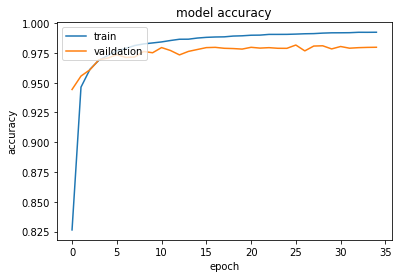

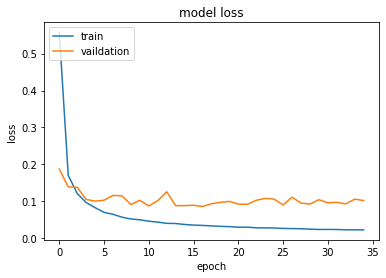

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'vaildation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'vaildation'], loc='upper left')
plt.show()

# Confusion matrix

<AxesSubplot:>

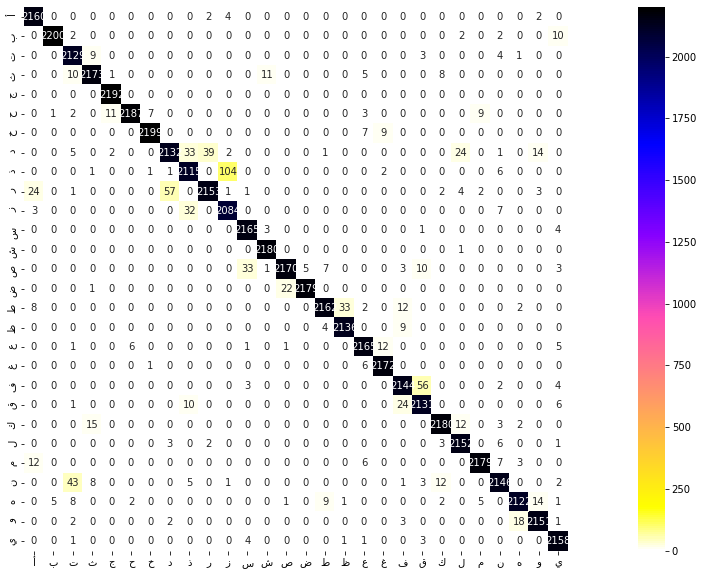

In [14]:
y_pred = model.predict(x_test)
y_classes = [np.argmax(element) for element in y_pred]
y_classes12 = [np.argmax(element) for element in y_test]
a=confusion_matrix(y_classes, y_classes12)
df_cm = pd.DataFrame(a, index = [i for i in "أبتثجحخدذرزسشصضطظعغفقكلمنهوي"],
                  columns = [i for i in "أبتثجحخدذرزسشصضطظعغفقكلمنهوي"])
plt.figure(figsize = (25,10))
sn.heatmap(df_cm, annot=True,cmap="gnuplot2_r",fmt='g', square=True)

# Classification report

In [16]:
c=classification_report(y_classes, y_classes12, output_dict=True)
df=pd.DataFrame(c).transpose()
df.index=["أ" ,"ب" ,"ت" ,"ث" ,"ج" ,"ح" ,"خ" ,"د" ,"ذ" ,"ر" ,"ز","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ك","ل","م","ن","ه","و","ي",'accuracy', 'macro avg', 'weighted avg']
df

,precision,recall,f1-score,support
أ,0.978704,0.996310,0.987429,2168.000000
ب,0.997280,0.992780,0.995025,2216.000000
ت,0.965533,0.992078,0.978626,2146.000000
ث,0.984594,0.984149,0.984371,2208.000000
ج,0.993654,1.000000,0.996817,2192.000000
ح,0.996355,0.985135,0.990713,2220.000000
خ,0.995924,0.992777,0.994348,2215.000000
د,0.971298,0.946294,0.958633,2253.000000
ذ,0.963554,0.948430,0.955932,2230.000000
ر,0.980419,0.957740,0.968947,2248.000000


# Showing some misclassified images

In [17]:
y_pred = model.predict(x_test)
y_classes = [np.argmax(element) for element in y_pred]
y_classes12 = [np.argmax(element) for element in y_test]
y_acutal=[]
y_miss=[]
ind=[]
img=[]
for i in range(len(y_classes12)):
     if y_classes[i] != y_classes12[i]:
        y_acutal.append(y_classes12[i])
        y_miss.append(y_classes[i])
        img.append(x_test[i])

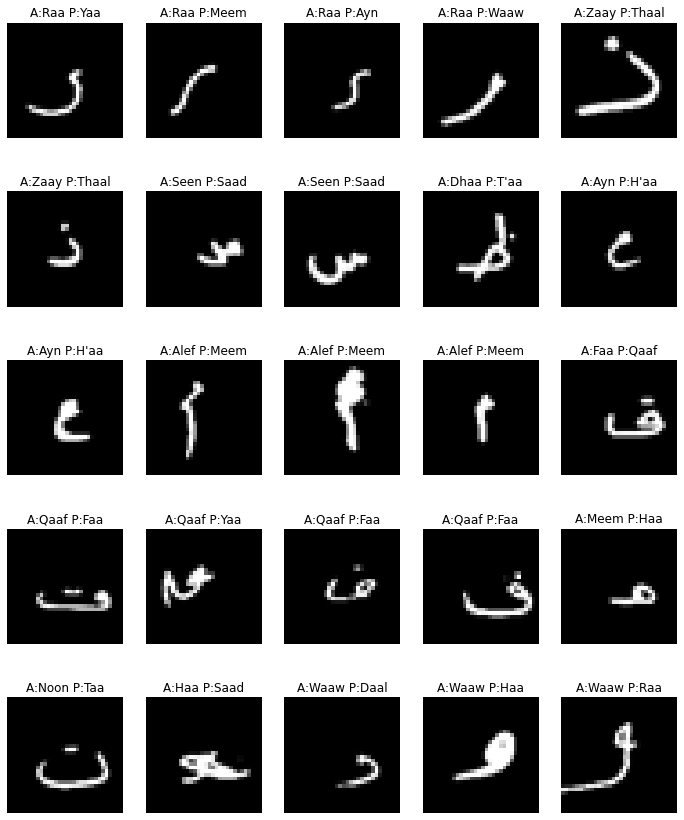

In [19]:
arabic_characters = ['Alef', 'Baa', 'Taa', 'Thaa', 'Jeem', "H'aa", 'Khaa', 'Daal', 'Thaal',
                    'Raa', 'Zaay', 'Seen', 'Sheen', 'Saad', 'Daad', "T'aa", 'Dhaa', 'Ayn',
                    'Ghayn', 'Faa', 'Qaaf', 'Kaaf', 'Laam', 'Meem', 'Noon', 'Haa', 'Waaw', 'Yaa']

plt.figure(figsize=(12 ,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(img[i],"gray")
    plt.axis("OFF")
    plt.title("A:"+arabic_characters[y_acutal[i]]+" P:"+arabic_characters[y_miss[i]])
plt.show()

# White Board Testing

In [9]:
def get_sides(length):
    if length%2==0:
        return length//2,length//2
    else:
        return (length-1)//2,1+(length-1)//2
    
    
def preprocess(character):
    if len(character.shape)<2:
        character = cv2.cvtColor(word, cv2.COLOR_BGR2GRAY)

    (wt, ht) = (32,32)
    (h, w) = character.shape
    fx = w / wt
    fy = h / ht
    f = max(fx, fy)
    newSize = (max(min(wt, int(w / f)), 1), max(min(ht, int(h / f)), 1)) 
    character = cv2.resize(character, newSize)

    if character.shape[0] < 32:
        add_zeros_up = np.zeros((get_sides(32-character.shape[0])[0], character.shape[1]))
        add_zeros_down = np.zeros((get_sides(32-character.shape[0])[1], character.shape[1]))
        character = np.concatenate((add_zeros_up,character))
        character = np.concatenate((character, add_zeros_down))

    if character.shape[1] < 32:
        add_zeros_left = np.zeros((32, get_sides(32-character.shape[1])[0]))
        add_zeros_right = np.zeros((32, get_sides(32-character.shape[1])[1]))
        
        character = np.concatenate((add_zeros_left,character), axis=1)
        character = np.concatenate((character, add_zeros_right), axis=1)

    character= character/255.0
    character = np.expand_dims(character , axis = 2)
    return character

def get_characters(img,kv=5):
    gray = img.copy()

    kernel = np.ones((kv,kv),dtype=np.uint8)
    if len(img.shape)==3:
        gray = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
        
    _, thresh = cv2.threshold(gray,127,255, cv2.THRESH_BINARY_INV)
    imgdilation = cv2.dilate(thresh,kernel, iterations=1)
    ctrs, _= cv2.findContours(imgdilation.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs,key = lambda ctr: cv2.boundingRect(ctr)[0])
    sorted_ctrs = sorted_ctrs[::-1]
    characters=[]
    for ctr in sorted_ctrs:
        x, y, w, h = cv2.boundingRect(ctr)

        acharacter = 255-np.array(img[y:y+h,x:x+w])
        acharacter = preprocess(acharacter)
        characters.append(acharacter)
    
    return characters,sorted_ctrs

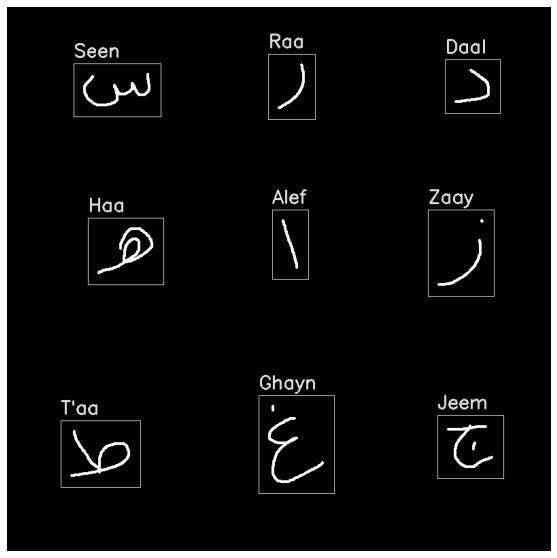

In [35]:

arabic_characters = ['Alef', 'Baa', 'Taa', 'Thaa', 'Jeem', "H'aa", 'Khaa', 'Daal', 'Thaal',
                    'Raa', 'Zaay', 'Seen', 'Sheen', 'Saad', 'Daad', "T'aa", 'Dhaa', 'Ayn',
                    'Ghayn', 'Faa', 'Qaaf', 'Kaaf', 'Laam', 'Meem', 'Noon', 'Haa', 'Waaw', 'Yaa']
page = cv2.imread('C:\\Users\\MOneb\\deep learning\\test123.png',cv2.IMREAD_GRAYSCALE)
characters = get_characters(page,30)[1]
for ctr in characters:
        x, y, w, h = cv2.boundingRect(ctr)

        acharacter = 255-np.array(page[y:y+h,x:x+w])
        acharacter = preprocess(acharacter)
        acharacter = acharacter.reshape(32,32,1)
        pred = model.predict([[acharacter]])
        page = cv2.rectangle(page, (x, y), (x + w, y + h), (36,255,12), 1)
        cv2.putText(page, arabic_characters[np.argmax(pred)], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
plt.figure(figsize=(10,10))
plt.imshow(page,"gray_r")
plt.axis("OFF")
plt.show()